# Importing Libraries 

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'oasKDAxx_MPa3GwoaP96'

In [3]:
# Importing dataset

df = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Original Data/AirPassengers.csv.xls',index_col = False)

In [4]:
data = pd.read_csv(r'/Users/sandeepti/Desktop/Achivement 6 /Original Data/AirPassengers.csv.xls',index_col = False)

In [5]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data.shape

(144, 2)

In [7]:
data.columns

Index(['Month', '#Passengers'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

TypeError: unhashable type: 'numpy.ndarray'

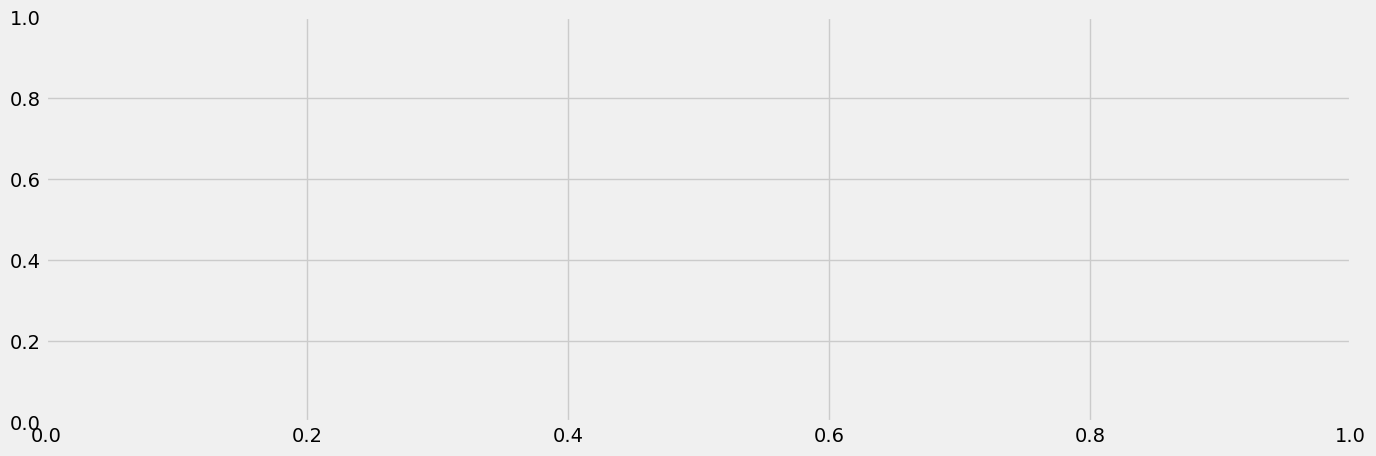

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)
my_array = np.array([1, 2, 3, 4])

### Subsetting, wrangling, and cleaning time-series data

In [76]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [72]:
data_2.head()

,index,Month,#Passengers
0,0,1949-01,112
1,1,1949-02,118
2,2,1949-03,132
3,3,1949-04,129
4,4,1949-05,121


In [73]:
data_sub = data_2.loc[(data_2['Month'] >= '1949-01') & (data_2['Month'] < '1960-12')]

In [49]:
data_sub.shape

(143, 3)

In [50]:
data_sub.head()

,index,Month,#Passengers
0,0,1949-01,112
1,1,1949-02,118
2,2,1949-03,132
3,3,1949-04,129
4,4,1949-05,121


In [83]:
# Set the "Month" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Month']) 
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Month'], axis=1, inplace=True) 
data_sub.head()

KeyError: 'Month'

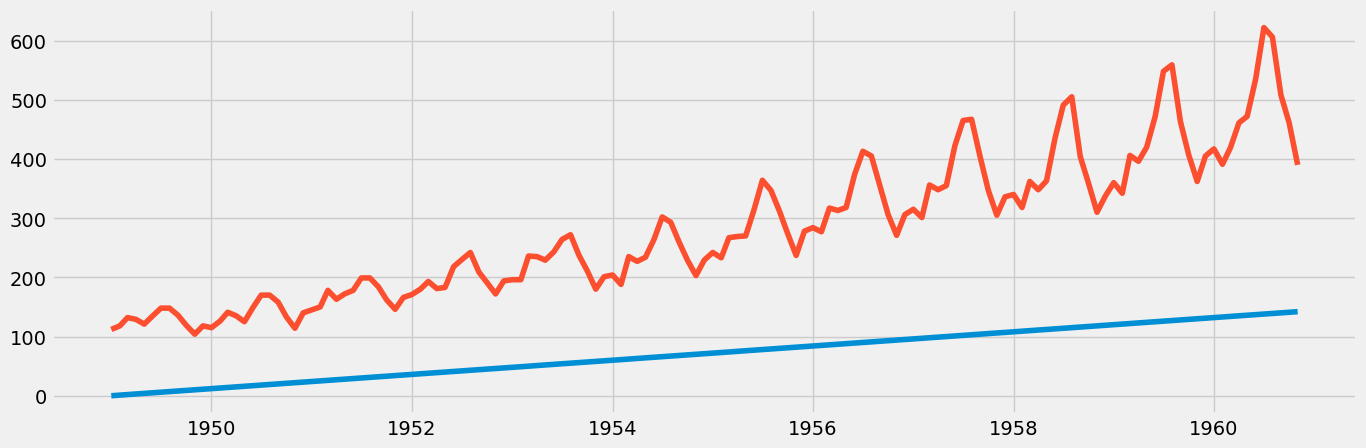

In [85]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [22]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

index          0
#Passengers    0
dtype: int64

In [23]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### Time-series analysis: decomposition

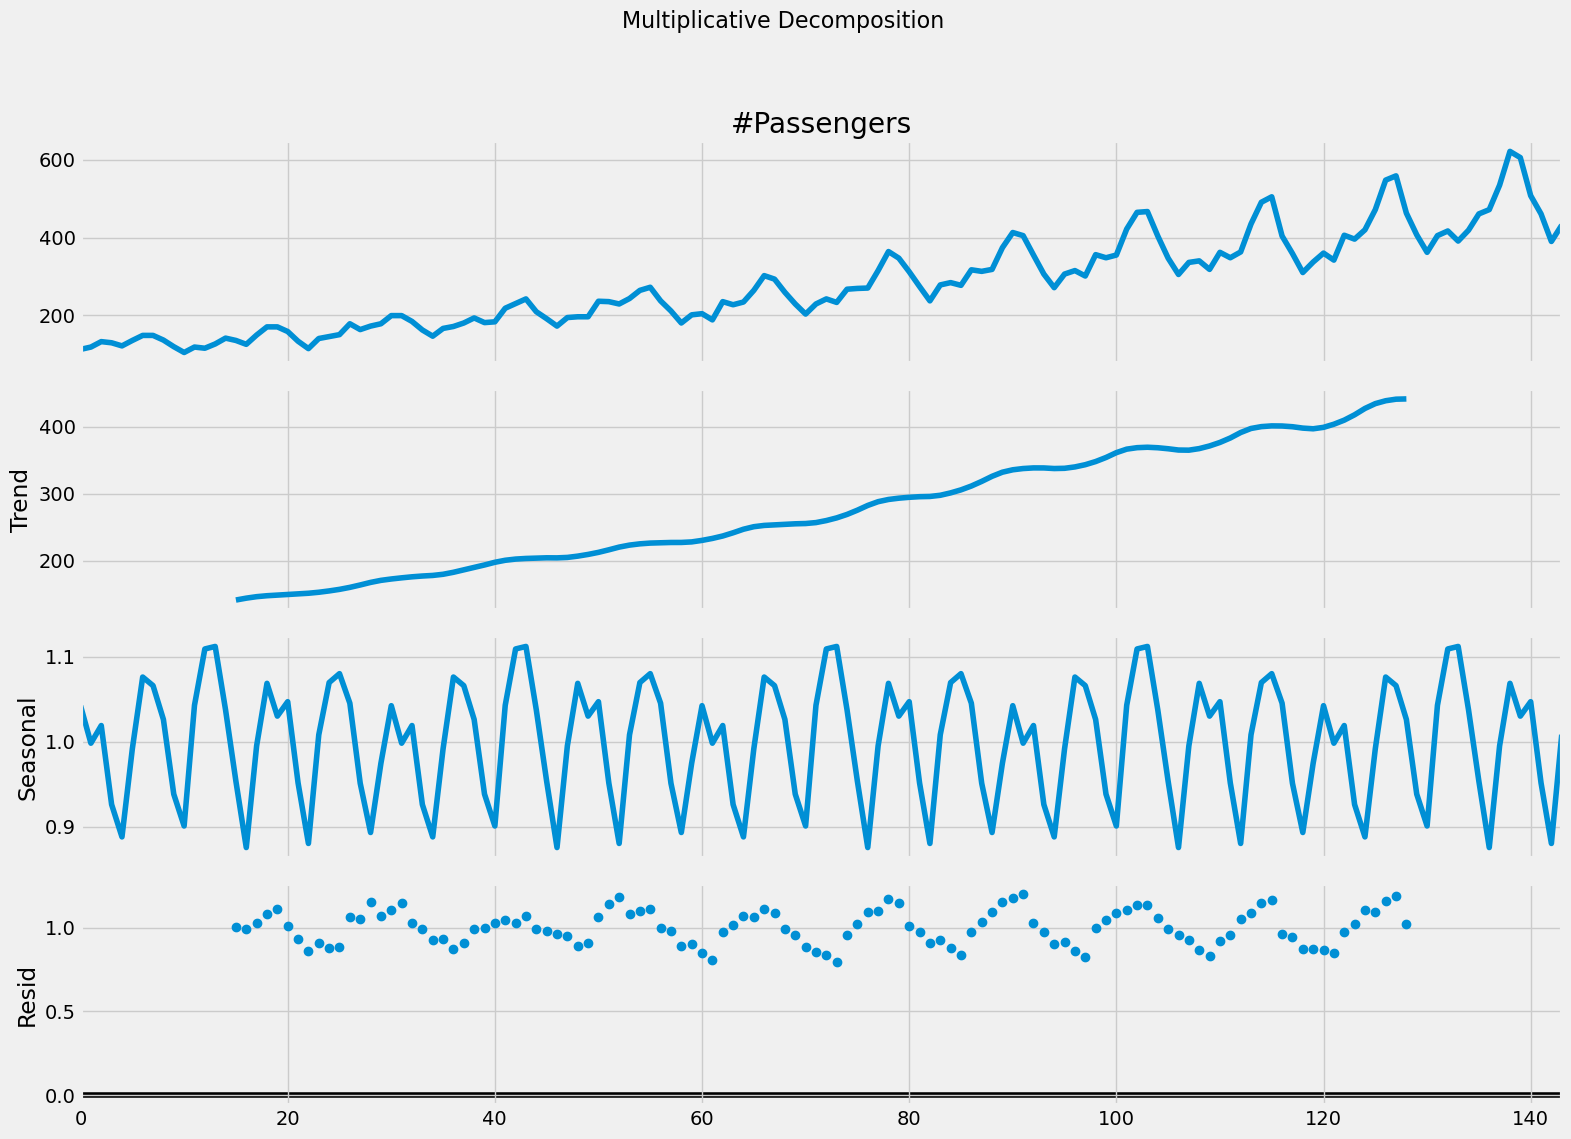

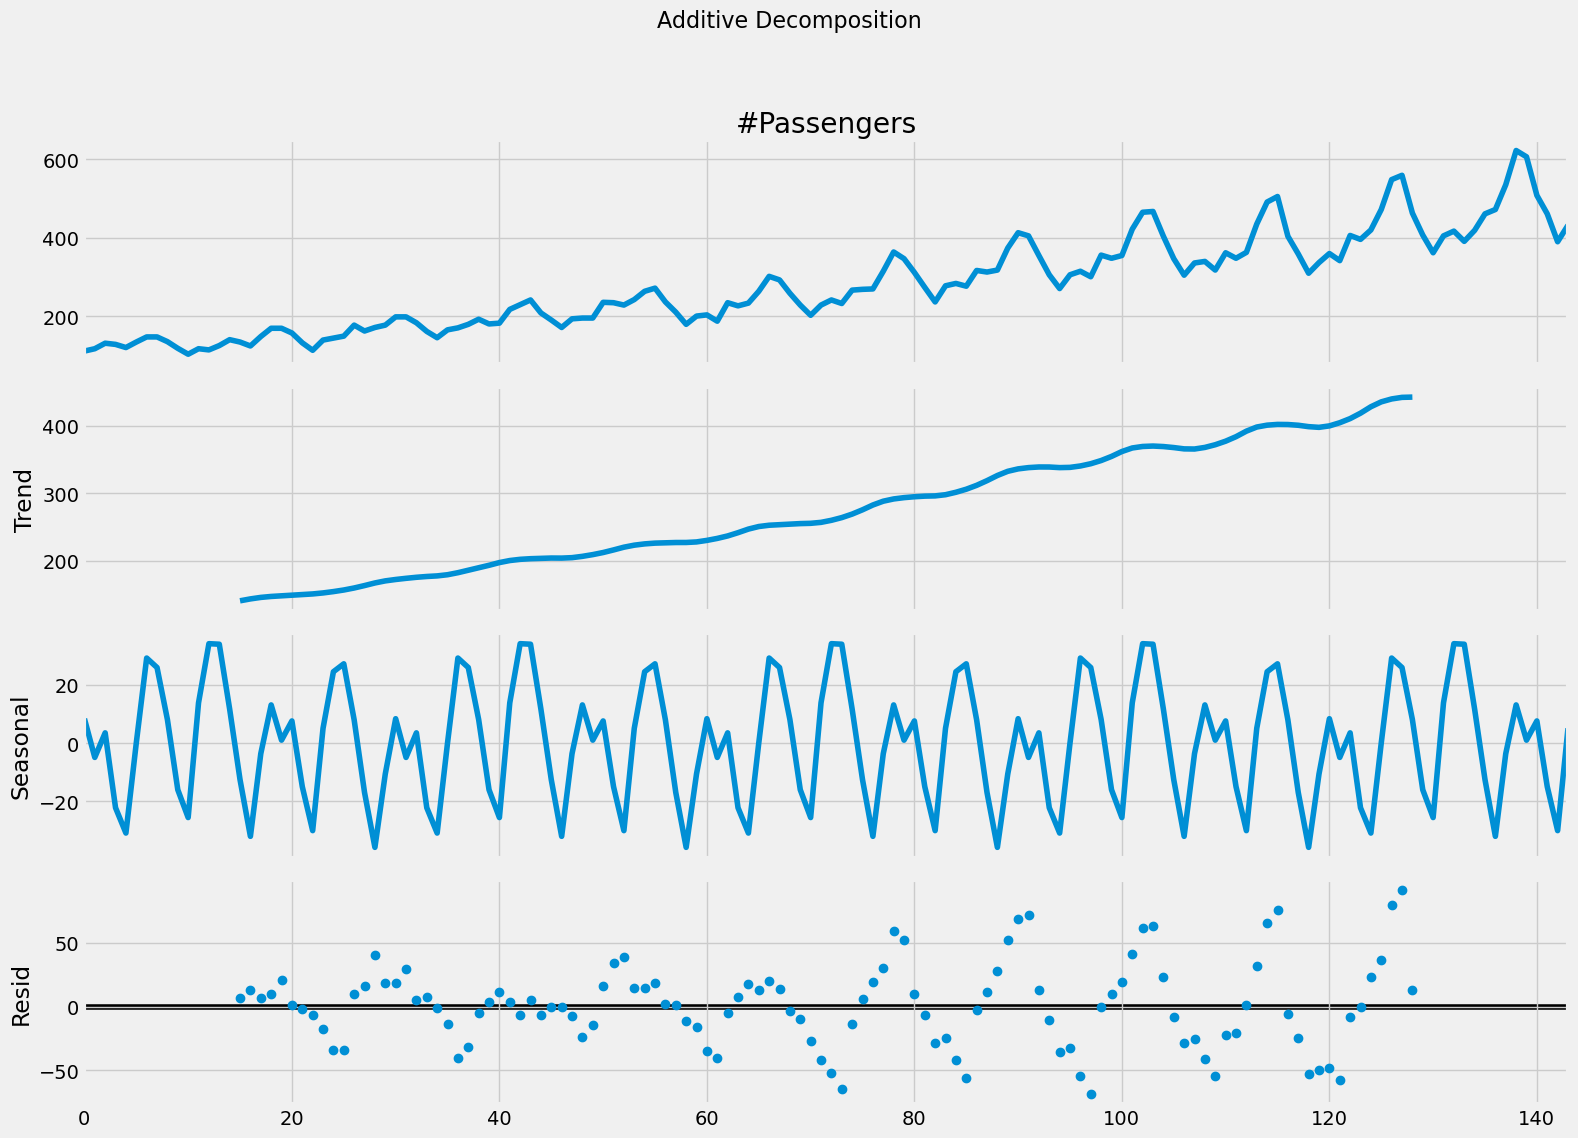

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Testing for stationarity

In [39]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['#Passengers'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.858591
p-value                          0.992525
Number of Lags Used             13.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


ValueError: x is required to have ndim 1 but has ndim 2

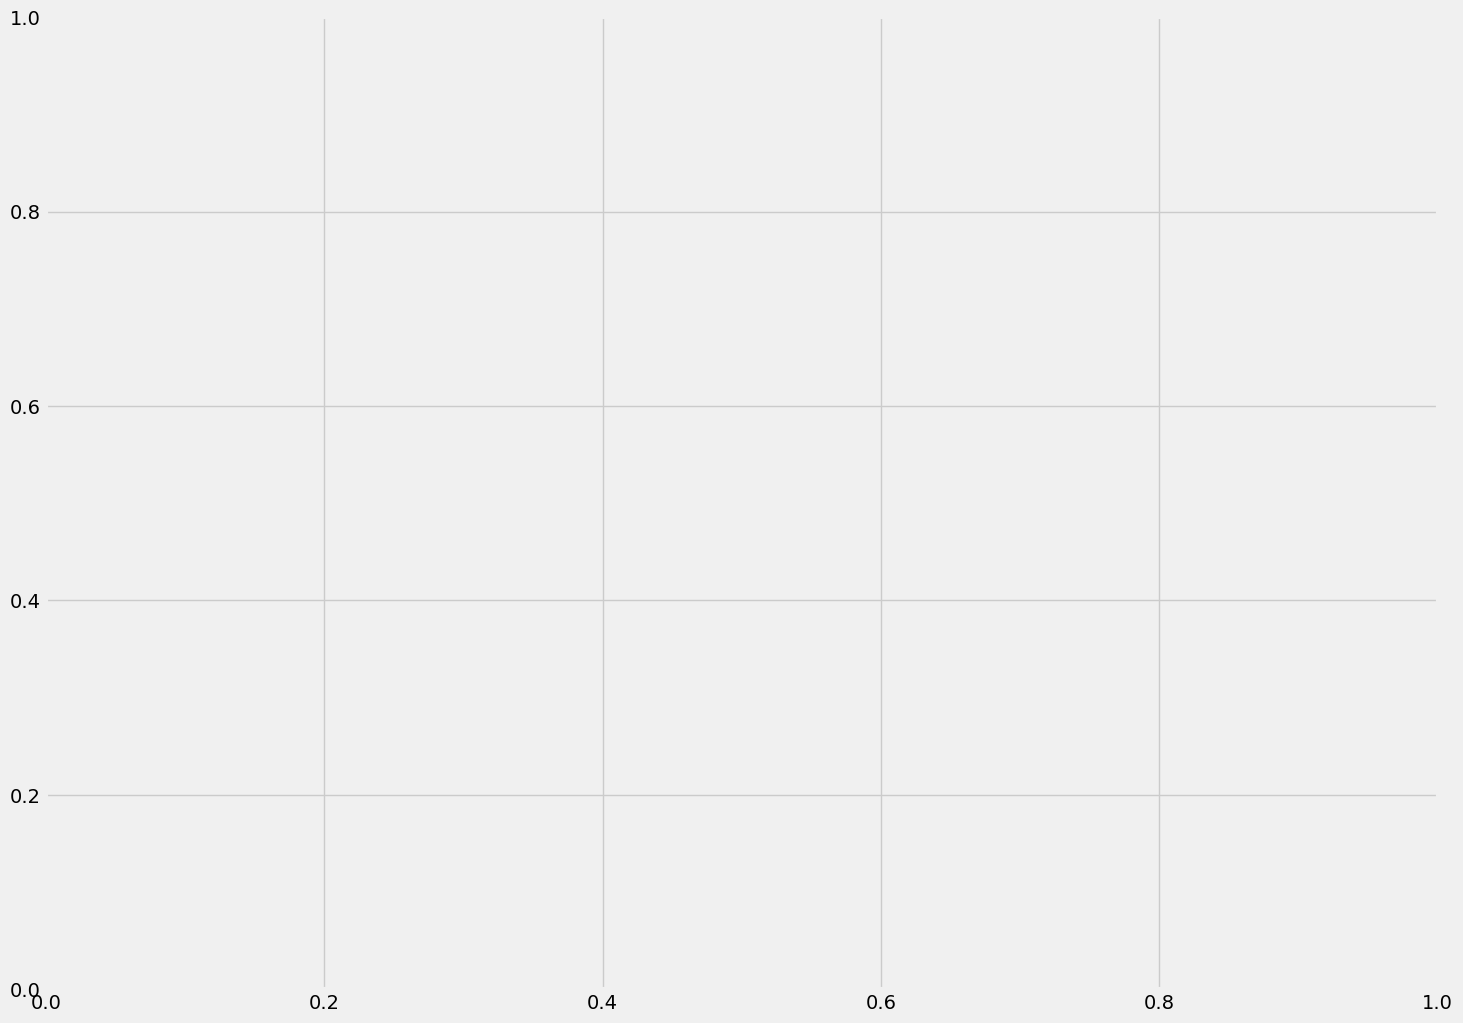

In [87]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### Stationarizing the Federal Reserve Economic Data

In [88]:
data_diff = data_sub - data_sub.shift(1)

In [89]:
data_diff.dropna(inplace = True)

In [90]:
data_diff.head()

,index,#Passengers
datetime,,
1949-02-01,1.0,6.0
1949-03-01,1.0,14.0
1949-04-01,1.0,-3.0
1949-05-01,1.0,-8.0
1949-06-01,1.0,14.0


In [91]:
data_diff.columns

Index(['index', '#Passengers'], dtype='object')

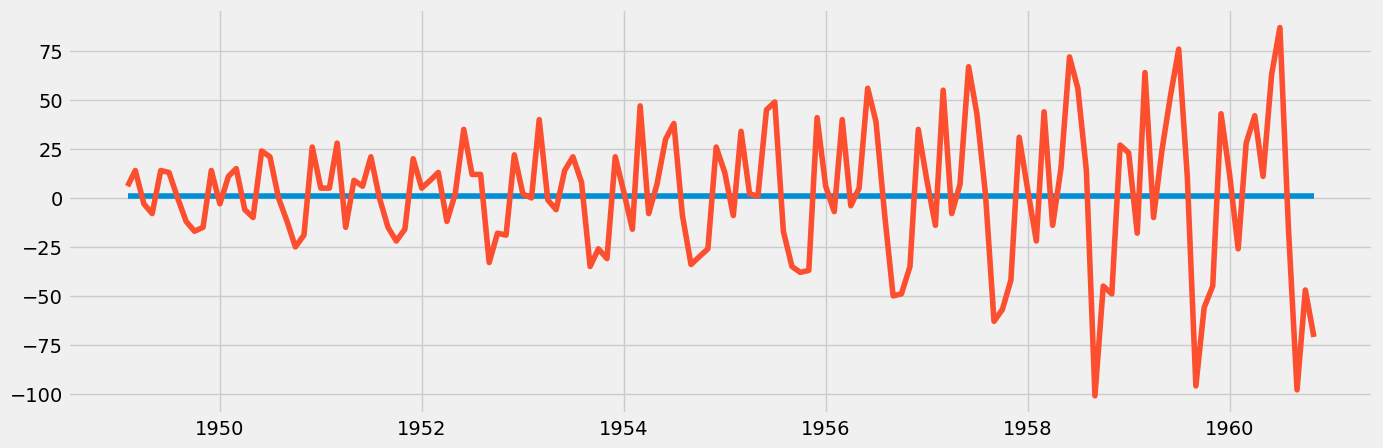

In [92]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [93]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:


ValueError: x is required to have ndim 1 but has ndim 2

ValueError: x is required to have ndim 1 but has ndim 2

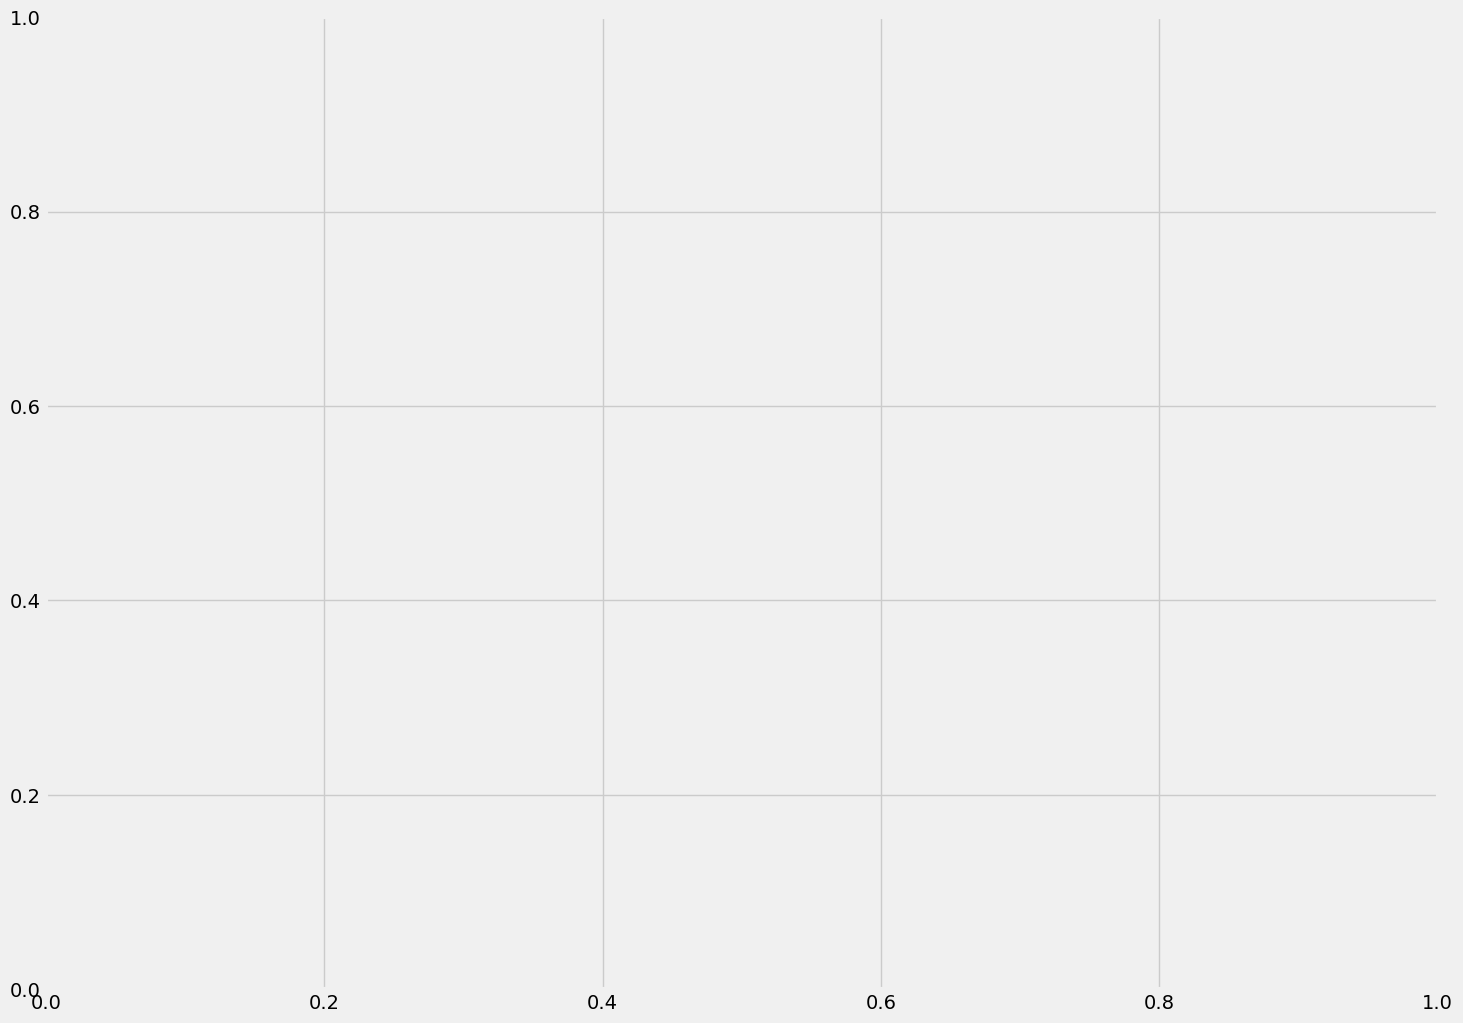

In [94]:
plot_acf(data_diff)
plt.show()